In [1]:
import warnings
warnings.filterwarnings("ignore")

## 查看torchvision.models中的预定义模型：

In [2]:
import torchvision.models as models

In [3]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

## ResNet预训练模型：

### 1、实例化一个resnet101模型：

In [4]:
# 使用resnet101来实例化一个具有101层的卷积神经网络
resnet = models.resnet101(pretrained=True)

In [5]:
# 查看网络结构信息，返回结果中的每一行就是深度学习中的层layers
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 2、加载预测图像并做预处理：

#### 读取图像：

In [6]:
from PIL import Image

# 读取预测图像
img = Image.open('./image.jpg')

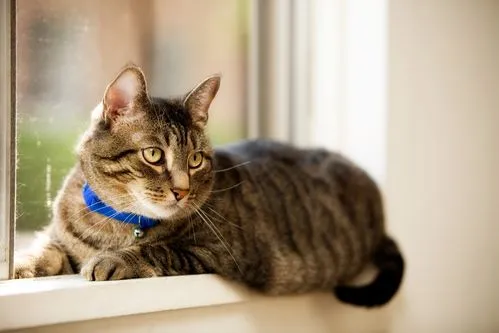

In [7]:
img

#### 图像预处理：

In [8]:
# 定义图像预处理函数
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256), # 将输入图像缩放到256*256大小
    transforms.CenterCrop(224), # 围绕图像中心点将其裁剪为224*224大小
    transforms.ToTensor(), # 将其转换为一个张量tensor
    transforms.Normalize( # 对图像RGB分量进行归一化处理，使其具有定义的均值和方差
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

In [9]:
img_t = preprocess(img)

#### 将Tensor转为图像：

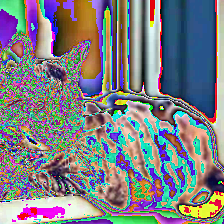

In [10]:
# 方法一：使用torchvision.transforms.ToPILImage()来将tensor转换为PIL图像
transforms.ToPILImage()(img_t) 

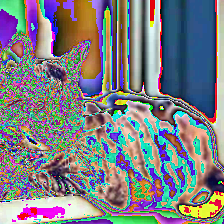

In [11]:
# 方法二：将tensor转为数组形式，在进行处理，最后使用PIL库转为图像
import numpy as np

# 使用numpy()函数将tensor转为数组形式，
# 再用transpose()函数将数组转置为PIL能够处理的WxHxC形式（PyTorch默认为CxWxH形式）
img_new = img_t.numpy().transpose(1,2,0)
# 将原来tensor里0-1的数值乘以255，以便转为uint8数据形式（图片的数值形式）
img_new = img_new * 255

#将img化为图片
Image.fromarray(np.uint8(img_new))

#### 按照网络输入要求对输入的张量进行维度扩展

In [12]:
import torch

# 使用unsqueeze()函数进行维度扩展，维度变化为：[3, 224, 224] --> [1, 3, 224, 224]
batch_t = torch.unsqueeze(img_t , 0)
batch_t.shape

torch.Size([1, 3, 224, 224])

### 3、运行模型：

In [13]:
# 要进行推理，需要将网络置于eval模式
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
# 模型输出结果：一个由1000个分数的向量，每一个分数对应ImageNet中的每个类
out = resnet(batch_t)
out

tensor([[-3.2444e+00, -1.9064e+00, -3.7759e+00, -2.9615e+00, -3.5997e+00,
         -2.9952e+00, -4.6614e+00, -2.3487e+00, -1.9136e+00, -2.0267e+00,
         -7.4748e-01, -3.2986e+00,  3.9570e-01, -2.3369e+00, -1.6109e+00,
          2.7386e-01, -2.1938e+00, -1.8212e+00, -1.8479e+00, -3.4155e+00,
         -1.2508e+00, -2.7752e+00, -2.9642e+00, -1.9414e+00, -7.4394e-01,
         -2.0072e+00, -9.1570e-01, -1.8161e+00, -1.7430e+00, -1.2308e+00,
         -1.3028e+00, -2.8093e+00, -2.0296e+00, -2.9684e+00, -1.7830e+00,
         -6.5380e-01,  1.1403e+00, -4.4437e-01, -7.6601e-01, -8.9677e-01,
         -3.1308e+00,  5.9074e-01, -2.3431e+00, -5.5833e-01, -7.3180e-01,
         -1.5757e+00, -1.0128e+00, -9.2548e-01, -1.9872e+00, -1.7374e+00,
         -1.7529e+00,  3.0713e-01, -2.9940e-01, -1.3351e+00, -6.6867e-01,
         -2.4962e+00, -2.9981e+00, -1.8309e+00, -2.2248e+00,  1.0867e+00,
         -4.7250e-01, -2.0079e+00,  5.9871e-02, -1.9821e+00, -1.2614e+00,
         -2.8995e+00,  1.6406e+00,  1.

In [15]:
out.shape

torch.Size([1, 1000])

### 4、获取模型预测结果：

#### 读取文件生成标签列表：

In [16]:
with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [17]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

#### 获取最高分对应的索引：

In [18]:
_ , index = torch.max(out , 1)

In [19]:
_

tensor([13.4302], grad_fn=<MaxBackward0>)

In [20]:
index

tensor([281])

#### 使用softmax将输出归一化到[0,1]范围，可以认为是模型预测结果的置信度

In [21]:
percentage = torch.nn.functional.softmax(out , dim=1)[0]*100

In [22]:
percentage

tensor([3.1712e-06, 1.2087e-05, 1.8638e-06, 4.2079e-06, 2.2227e-06, 4.0685e-06,
        7.6878e-07, 7.7665e-06, 1.1999e-05, 1.0716e-05, 3.8513e-05, 3.0037e-06,
        1.2081e-04, 7.8585e-06, 1.6242e-05, 1.0695e-04, 9.0671e-06, 1.3162e-05,
        1.2814e-05, 2.6724e-06, 2.3282e-05, 5.0697e-06, 4.1968e-06, 1.1671e-05,
        3.8650e-05, 1.0927e-05, 3.2550e-05, 1.3229e-05, 1.4231e-05, 2.3754e-05,
        2.2102e-05, 4.8996e-06, 1.0686e-05, 4.1790e-06, 1.3674e-05, 4.2296e-05,
        2.5436e-04, 5.2149e-05, 3.7806e-05, 3.3172e-05, 3.5526e-06, 1.4682e-04,
        7.8101e-06, 4.6532e-05, 3.9122e-05, 1.6824e-05, 2.9537e-05, 3.2234e-05,
        1.1148e-05, 1.4312e-05, 1.4092e-05, 1.1057e-04, 6.0285e-05, 2.1400e-05,
        4.1671e-05, 6.7015e-06, 4.0567e-06, 1.3035e-05, 8.7906e-06, 2.4109e-04,
        5.0703e-05, 1.0920e-05, 8.6345e-05, 1.1205e-05, 2.3036e-05, 4.4772e-06,
        4.1951e-04, 9.1952e-05, 1.1693e-04, 4.9782e-05, 4.8945e-06, 8.1821e-05,
        9.2297e-06, 2.2216e-05, 1.5038e-

#### 获取预测结果标签及置信度：

In [23]:
labels[index[0]] , percentage[index[0]].item()

('tabby, tabby cat', 55.32239532470703)

#### 获取预测结果前五名的标签及置信度：

In [24]:
_ , indices = torch.sort(out , descending=True)

In [25]:
n = 1
for idx in indices[0][0:5]:
    print(f"预测第{n}名：类别为{labels[idx]},置信度为{percentage[idx].item()}")
    n += 1

预测第1名：类别为tabby, tabby cat,置信度为55.32239532470703
预测第2名：类别为Egyptian cat,置信度为25.100072860717773
预测第3名：类别为tiger cat,置信度为17.506240844726562
预测第4名：类别为lynx, catamount,置信度为0.30555540323257446
预测第5名：类别为quilt, comforter, comfort, puff,置信度为0.09972941875457764
